### SENTIMENT ANALYSIS USING LOGISTIC REGRESSION MODEL ON AMAZON REVIEWS AND RATINGS DATASET

**Importing Liabraries and Dataset**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('amazon_baby.csv')
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


**Data Cleaning and Preprocessing**

In [18]:
# Drop rows with missing values in the 'review' or 'rating' columns
data = data.dropna(subset=['review'])

# Create a new column 'sentiment' based on 'rating'. Positive if rating > 3, else negative
data['sentiment'] = np.where(data['rating'] > 3, 1, 0)

# Check the first few rows again
data[['review', 'rating', 'sentiment']].head()

<ipython-input-18-f3c933cdcfb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = np.where(data['rating'] > 3, 1, 0)


,review,rating,sentiment
0,"These flannel wipes are OK, but in my opinion ...",3,0
1,it came early and was not disappointed. i love...,5,1
2,Very soft and comfortable and warmer than it l...,5,1
3,This is a product well worth the purchase. I ...,5,1
4,All of my kids have cried non-stop when I trie...,5,1


In [19]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42
)


**Text Feature Extraction**


In [20]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data into a term-document matrix
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data into the same matrix format
X_test_vectorized = vectorizer.transform(X_test)


**Train the Logistic Regression Model**

In [21]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


LogisticRegression()

In [22]:
# Make predictions on the test data
y_pred = model.predict(X_test_vectorized)


**Evaluate the Model**

In [23]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      3164
           1       0.89      0.93      0.91      9586

    accuracy                           0.86     12750
   macro avg       0.83      0.80      0.81     12750
weighted avg       0.86      0.86      0.86     12750

Confusion Matrix:
[[2084 1080]
 [ 652 8934]]


**Interpretation and Visualzation**

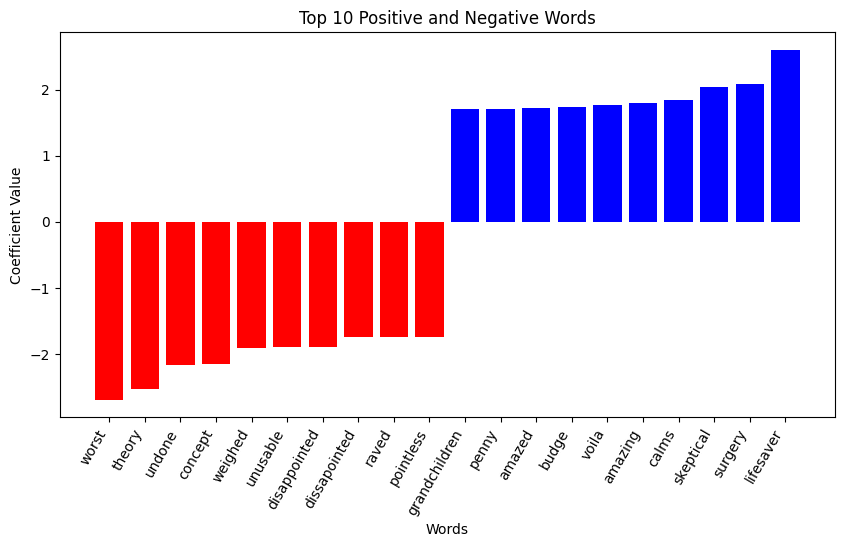

In [24]:
import matplotlib.pyplot as plt

# Get the model coefficients and feature names (words)
coefficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Sort the coefficients by importance for positive and negative sentiment
top_positive_coefficients = np.argsort(coefficients)[-10:]  # Top 10 positive coefficients
top_negative_coefficients = np.argsort(coefficients)[:10]   # Top 10 negative coefficients
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

# Plot the top words and their coefficients
plt.figure(figsize=(10, 5))
colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
plt.bar(np.arange(2 * 10), coefficients[top_coefficients], color=colors)
plt.xticks(np.arange(2 * 10), [feature_names[i] for i in top_coefficients], rotation=60, ha='right')
plt.title("Top 10 Positive and Negative Words")
plt.xlabel("Words")
plt.ylabel("Coefficient Value")
plt.show()


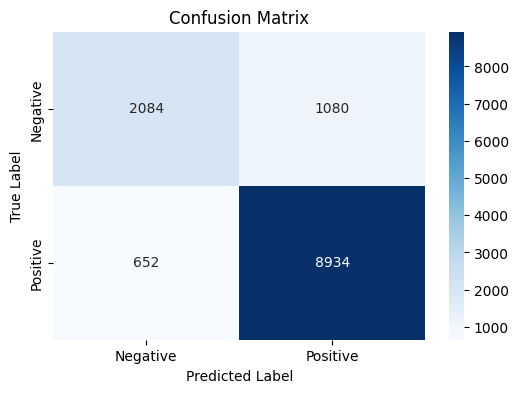

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


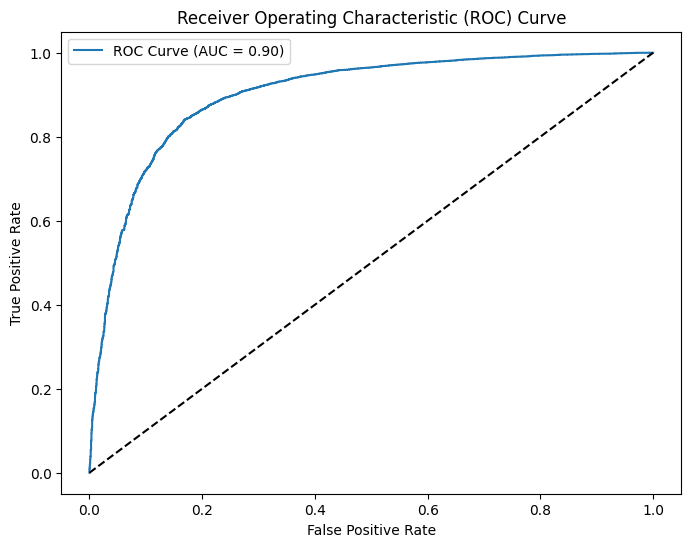

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test_vectorized)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()